In [1]:
# import required package for data handling and analyzation
import pandas as pd
import numpy as np
import re
import statsmodels.api as sm
from scipy import stats
import matplotlib as plt
import seaborn as sns
#import plotly import _version_

In [2]:
# import required packages for splitting data
#from sklearn import model_selection
#from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import train_test_split

# import required packages for evaluating models
#from sklearn import metrics
#from sklearn.metrics import confusion_matrix
#from sklearn.metrics import classification_report
#rom sklearn.metrics import roc_auc_score
#from sklearn.metrics import accuracy_score
#from sklearn.metrics import precision_recall_fscore_support

# import `logistic regression` model
#from sklearn.linear_model import LogisticRegression

# THE WAY FORWARD TO THE LIGHT

Prework: Handle missing data, dashes, inconsistant data, 
    
    1. Selected Imputation methods by column
       - Get code from Dawn
       - mean, median, mode
    2. Normalize
       - Code from Brian
           - Sqrt
           - Log
           - 1/X
       - Impute again for inf errors
    3. Add calculated fields (Mike to provide code)
       - Y1
       - Y2
       - C3'
       - C5'
       - C6'
    4. Correlation + Heat map from Mike
       - Pearson
       - Kendall
       - Spearman
    5. Reduce to selected independent variables
       - Use Correlation methods to eliminate Fields
       - Use Feature Importance to determine which ones to keep
       - Feature Engeneering of P/Sales ratio
       - make some fields bianary
    6. Run evaluation code

# Tao Pipeline Instructions 

 ### Front-End (does not change)

 1. Describe the data
    - stats
    - charts
    - skew functions
 2. Missing (Separate the data set beween continuous and categorical)
    - Mean 
    - Median
    - Possible mean of SIC code cluster
    - Mode not applicable since most of the columns used are continuous
 3. Calculated Fields
    - create and calcualte the calcualted fields
 4. Run evaluation code as a baseline for the remaining items in the pipeline

 ### Middle of the Pipeline (This is where we have flexability in terms of order

   A. Normalization
   B. Std Dev - Outlier detection (NEEDS NORMALIZATION FIRST)
   C. Stanardize - z-score (NEEDS NORMALIZATION FIRST)
   D. IQR Outlier detection (NORMALIZATION NOT NEEDED FIRST)
   E. Min - Max Standardization (NORMALIZATION NOT NEEDED FIRST)

 ### Back-End (does not change)

 1. Correlation
   - Pearson
   - Kendall
   - Spearman
   
 2. Binning 

 3. Feature Selection

 4. Run Evaluation Code

In [3]:
#initial importing of the raw data to be cleaned
# add code to remove the -1 and the error SIC numbers
df = pd.read_excel('Competition1_raw_data.xlsx',na_values=r'-')

In [4]:
#taking a look at the data to see if there are any visible errors
#10 shows "-" as blank values
df.head(15)

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,10600000.0,51.345,470.0,12719.0,11560.0,301.0,690.0,62.0,117.0,139.0
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,2400000.0,25.936,791.0,21792.0,19585.0,510.0,1120.0,71.0,242.0,237.0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,5000000.0,7.378,201.0,5262.0,4785.0,128.0,325.0,61.0,33.0,60.0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,4500000.0,8.526,328.0,8259.0,7574.0,177.0,509.0,80.0,59.0,110.0
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,8250000.0,632.298,572.0,14830.0,13176.0,336.0,720.0,67.0,149.0,167.0
5,ACOM,Ancestry.com Inc.,7379,13.5,14.5,12.5,14.200000,94.0,1.0,0.06,...,7407407.0,197.591,510.0,17999.0,13934.0,328.0,815.0,62.0,96.0,181.0
6,ACOR,ACORDA THERAPEUTICS INC,2836,6.0,13.0,11.0,6.720000,128.0,1.0,-1.87,...,5500000.0,5.146,495.0,15758.0,13953.0,379.0,698.0,82.0,106.0,135.0
7,ACRX,ACELRX PHARMACEUTICALS INC,2834,5.0,14.0,12.0,4.550000,91.0,0.0,-0.74,...,8000000.0,NaN,334.0,11226.0,10056.0,276.0,-1.0,55.0,120.0,122.0
8,ACTV,ACTIVE NETWORK INC,7372,15.0,18.0,16.0,15.900000,100.0,1.0,-0.51,...,11000000.0,279.600,620.0,14813.0,13463.0,335.0,917.0,58.0,124.0,234.0
9,ACW,ACCURIDE CORP,3714,9.0,19.0,17.0,0.000000,106.0,1.0,1.49,...,11000000.0,494.008,385.0,9134.0,8107.0,198.0,459.0,81.0,90.0,147.0


In [5]:
df.info() # getting more info on the data
#df.describe() #not needed at the moment because all types are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null float64
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: float64(19), object(3)
memory usage: 117.3+ KB


In [6]:
# Describe the Data - Exploratory Data Analysis
df.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,677.000000,672.000000,672.000000,660.000000,660.000000,660.000000,646.000000,660.000000,6.760000e+02,6.760000e+02,610.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000
mean,13.837666,15.481190,13.515045,25.934766,149.728788,0.859091,1.788904,0.007282,4.935776e+07,1.241519e+07,500.459962,465.634361,12758.606461,11395.844347,294.353891,679.220264,68.421439,120.104258,144.759178
std,6.053731,6.653429,5.835646,73.234948,152.817467,0.348192,162.666532,0.033318,1.043764e+08,2.512855e+07,1648.337634,175.741647,5449.644597,4839.670179,121.532637,472.914323,39.096525,84.828959,69.276285
min,3.000000,0.000000,3.000000,0.000000,10.000000,0.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,20.000000,26.000000
25%,10.000000,12.500000,11.000000,11.000000,85.000000,1.000000,-0.852500,-0.013927,1.871417e+07,5.000000e+06,37.245750,351.000000,9195.000000,8162.000000,213.000000,462.000000,45.000000,73.000000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,1.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12045.000000,10785.000000,279.000000,624.000000,60.000000,100.000000,134.000000
75%,17.000000,17.000000,15.000000,20.485000,155.250000,1.000000,0.470000,0.031571,4.980786e+07,1.200000e+07,331.138000,551.000000,15241.000000,13760.000000,354.000000,795.000000,85.000000,142.000000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,1.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.000000,883.000000


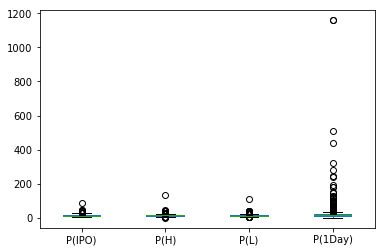

In [7]:
# Add Box Plots to further Describe the Data - for the Ps
df_p=df.iloc[:,3:7]
df_p.plot.box()

In [8]:
#Interpretation of above: All P variables are positively skewed, particularly P(1Day).

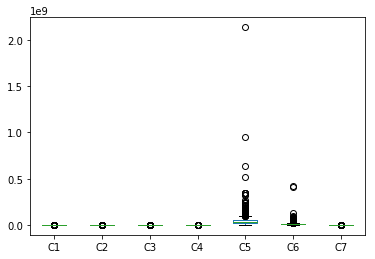

In [9]:
# Add Box Plots to further Describe the Data - for the Cs
df_p2=df.iloc[:,7:14]
df_p2.plot.box()

In [10]:
#Interpretation of above: All C variables are positively skewed, particularly C5.

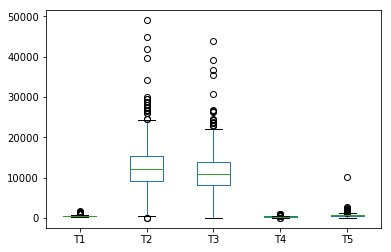

In [11]:
# Add Box Plots to further Describe the Data - for the Ts
df_p3=df.iloc[:,14:19]
df_p3.plot.box()

In [12]:
#Interpretation of above: All T variables are positively skewed, particularly T2 & T3.

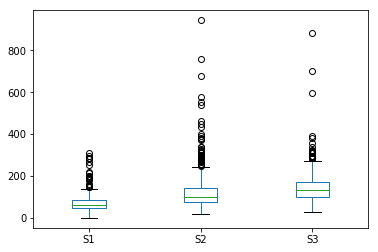

In [13]:
# Add Box Plots to further Describe the Data - for the Ss
df_p4=df.iloc[:,19:22]
df_p4.plot.box()

In [14]:
#Interpretation of above: All S variables are positively skewed.

In [15]:
df_copy = df.copy() # making a copy of the dataframe to preserve the original data

In [16]:
#df_copy['I3'].str.split(n=4)

In [17]:
#Change the data types
df_copy.iloc[:,3:8].astype(float)
df_copy.iloc[:,9:].astype(float)
df_copy['C2'] = df_copy['C2'].astype('category')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         674 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         681 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         681 non-null float64
S1         681 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


In [18]:
#Addressing negative ones found in the data
df_copy.iloc[[7,134],[18,19]]

,T5,S1
7,-1.0,55.0
134,643.0,-1.0


In [19]:
#Replace negative ones in the data with "Nan"
df_copy.iloc[7,18] = float('Nan')
df_copy.iloc[134,19] = float('Nan')
df_copy.iloc[[7,134],[18,19]]

,T5,S1
7,NaN,55.0
134,643.0,NaN


In [20]:
#Addressing the zeros found in columns T2 (Note: no zeros in T1)
df_copy.iloc[[125,199],[15]]

,T2
125,0.0
199,0.0


In [21]:
#Replace zeros in the data with "Nan"
df_copy.iloc[125,15] = float('Nan')
df_copy.iloc[199,15] = float('Nan')
df_copy.iloc[[125,199],[15]]

,T2
125,NaN
199,NaN


In [22]:
#Print list of entries with improper SIC codes
df_copy.iloc[[10,86,268,330,400,490,597,614,118,174,181,187,221,246,499,620],[0,1,2]]

,I1,I2,I3
10,ADKU,"ADCARE HEALTH SYSTEMS, INC",NaN
86,BLT,BLOUNT INTERNATIONAL INC,NaN
268,GSL,GLOBAL SIGNAL INC,NaN
330,KFI,KKR Financial Holdings LLC,NaN
400,NAUH,"National American University Holdings, Inc.",NaN
490,RCH,"CHINA CGAME, INC.",NaN
597,TRMM,"Access to Money, Inc.",NaN
614,TZOO,TRAVELZOO INC,NaN
118,CERE,"Ceres, Inc.",100
174,DLB,"Dolby Laboratories, Inc.","6794, 3861, 3663, 7819"


In [23]:
#SIC 1191 should be 0191 and 1783 should be 0783 change later to deal with beginning zero.
#Also add code to bin the SIC code into text via dictionary (i.e., name of SIC Code category)
missing_I3 = ['8051','5122','6798','6199','8221','3200','6099','4724','5261','7812','1191','1783','7389','7389','3663','5065']

In [24]:
#Replace improper SIC codes with values ascertained via independent research
df_copy.iloc[[10,86,268,330,400,490,597,614,118,174,181,187,221,246,499,620],2] = missing_I3
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 22 columns):
I1         682 non-null object
I2         682 non-null object
I3         682 non-null object
P(IPO)     677 non-null float64
P(H)       672 non-null float64
P(L)       672 non-null float64
P(1Day)    660 non-null float64
C1         660 non-null float64
C2         660 non-null category
C3         646 non-null float64
C4         660 non-null float64
C5         676 non-null float64
C6         676 non-null float64
C7         610 non-null float64
T1         681 non-null float64
T2         679 non-null float64
T3         681 non-null float64
T4         681 non-null float64
T5         680 non-null float64
S1         680 non-null float64
S2         681 non-null float64
S3         681 non-null float64
dtypes: category(1), float64(18), object(3)
memory usage: 112.8+ KB


# Imputation Code

### Include a column to determine if the row needs imputing to keep track of changes by row


In [25]:
#df_mean = df_copy.fillna(df_copy.mean())
#df_median = df_copy.fillna(df_copy.median())
#df_mode = df_copy.fillna(df_copy.mode[0](dropna=True,numeric_only=True))

In [26]:
#df_median['C4'].head(25)

In [27]:
# Dawn's code
#Since none of the values are 100% normal, I think we should use the median value (vs. mean)
#when imputing missing values for continuous variables (i.e., all but C2);
#for the categorical variable (C2), we should use the mode.

#fist make a copy of the dataframe to preserve the original data
df_impute_copy = df_copy.copy()

#Start with C2 - by determining the mode
df_impute_copy['C2'].mode()

#Since none of the values are 100% normal, I think we should use the median value (vs. mean)
#when imputing missing values for continuous variables (i.e., all but C2);
#for the categorical variable (C2), we should use the mode.
# Include a column to determine if the row needs imputing to keep track of changes by row

#then impute median for P(IPO), P(H), P(L), P(1Day)
df_impute_copy['P(IPO)'].fillna(df_impute_copy['P(IPO)'].median(), inplace=True)
df_impute_copy['P(H)'].fillna(df_impute_copy['P(H)'].median(), inplace=True)
df_impute_copy['P(L)'].fillna(df_impute_copy['P(L)'].median(), inplace=True)
df_impute_copy['P(1Day)'].fillna(df_impute_copy['P(1Day)'].median(), inplace=True)

#now impute median for C1, C3, C4, C5, C6, C7
df_impute_copy['C1'].fillna(df_impute_copy['C1'].median(), inplace=True)
df_impute_copy['C3'].fillna(df_impute_copy['C3'].median(), inplace=True)
df_impute_copy['C4'].fillna(df_impute_copy['C4'].median(), inplace=True)
df_impute_copy['C5'].fillna(df_impute_copy['C5'].median(), inplace=True)
df_impute_copy['C6'].fillna(df_impute_copy['C6'].median(), inplace=True)
df_impute_copy['C7'].fillna(df_impute_copy['C7'].median(), inplace=True)

#now impute mode for C2...using the mode determined above (i.e., the series above with one number in it)
#df_impute_copy['C2'].fillna(1.0, inplace=True)
df_impute_copy['C2'].fillna(df_impute_copy['C2'].mode()[0],inplace=True)

#now impute median for T1, T2, T3, T4, T5
df_impute_copy['T1'].fillna(df_impute_copy['T1'].median(), inplace=True)
df_impute_copy['T2'].fillna(df_impute_copy['T2'].median(), inplace=True)
df_impute_copy['T3'].fillna(df_impute_copy['T3'].median(), inplace=True)
df_impute_copy['T4'].fillna(df_impute_copy['T4'].median(), inplace=True)
df_impute_copy['T5'].fillna(df_impute_copy['T5'].median(), inplace=True)

#now impute median for S1, S2, S3
df_impute_copy['S1'].fillna(df_impute_copy['S1'].median(), inplace=True)
df_impute_copy['S2'].fillna(df_impute_copy['S2'].median(), inplace=True)
df_impute_copy['S3'].fillna(df_impute_copy['S3'].median(), inplace=True)

#check work
df_impute_copy.head(15)

#Double-checking via "describe" - all imputation done except for C2
df_impute_copy.describe()

,P(IPO),P(H),P(L),P(1Day),C1,C3,C4,C5,C6,C7,T1,T2,T3,T4,T5,S1,S2,S3
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.00000,682.000000
mean,13.835191,15.474135,13.507493,25.577032,148.350440,1.695003,0.007342,4.916458e+07,1.237106e+07,458.587321,465.602639,12792.900293,11394.948680,294.331378,680.057185,68.498534,120.07478,144.743402
std,6.031536,6.604652,5.792972,72.068973,150.518513,158.309101,0.032777,1.039359e+08,2.502200e+07,1563.531760,175.614521,5401.665364,4836.172083,121.444797,471.856119,38.979729,84.77015,69.226629
min,3.000000,0.000000,3.000000,0.000000,10.000000,-786.239000,-0.162352,3.693227e+06,5.250000e+05,0.074000,132.000000,527.000000,0.000000,0.000000,167.000000,5.000000,20.00000,26.000000
25%,10.000000,13.000000,11.000000,11.092500,85.000000,-0.750000,-0.013352,1.874682e+07,5.004180e+06,41.511500,351.250000,9213.250000,8168.000000,213.250000,463.250000,45.000000,73.00000,100.000000
50%,13.500000,15.000000,13.000000,14.845000,107.000000,0.010000,0.009125,2.740018e+07,7.398704e+06,103.833000,444.000000,12049.000000,10785.000000,279.000000,624.500000,60.000000,100.00000,134.000000
75%,17.000000,17.000000,15.000000,20.087500,152.750000,0.440000,0.030941,4.936364e+07,1.193426e+07,289.758000,550.750000,15240.250000,13751.500000,353.750000,794.500000,84.750000,141.75000,173.000000
max,85.000000,135.000000,108.000000,1159.200562,2087.000000,3864.500000,0.092896,2.138085e+09,4.212336e+08,30683.000000,1750.000000,49056.000000,43952.000000,1058.000000,10277.000000,309.000000,944.00000,883.000000


In [28]:
df_impute_copy.isnull().sum()

I1         0
I2         0
I3         0
P(IPO)     0
P(H)       0
P(L)       0
P(1Day)    0
C1         0
C2         0
C3         0
C4         0
C5         0
C6         0
C7         0
T1         0
T2         0
T3         0
T4         0
T5         0
S1         0
S2         0
S3         0
dtype: int64

In [29]:
#Add calculated fields

#Create P(mid) variable
df_impute_copy['P(mid)'] = (df_impute_copy['P(H)'] + df_impute_copy['P(L)']) / 2

#Create variable true_value for C6P
true_value = ((df_impute_copy['P(IPO)'] - df_impute_copy['P(mid)']) / df_impute_copy['P(mid)'])*100

# Add T1'=T4/T1 & S1'=S1/T2 Calcualte all the ratios for the Ts & S Colums
df_impute_copy['Long_to_Total_Sentences'] = df_impute_copy['T4'] / df_impute_copy['T1']
df_impute_copy['Pos_to_Total_Words'] = df_impute_copy['S1'] / df_impute_copy['T2']
df_impute_copy['Neg_to_Total_Words'] = df_impute_copy['S2'] / df_impute_copy['T2']
df_impute_copy['Pos_Neg_Words'] = df_impute_copy['S1'] / df_impute_copy['S2']
df_impute_copy['Long_to_Total_Words'] = df_impute_copy['T5'] / df_impute_copy['T2']
df_impute_copy['Real_to_Total_Words'] = df_impute_copy['T3'] / df_impute_copy['T2']

#Create new columns for "prime" variables
#Add them to df_impute_copy
df_impute_copy['C3P'] = np.where(df_impute_copy['C3'] > 0, '1', '0')
df_impute_copy['C5P'] = df_impute_copy['C5'] / df_impute_copy['C6']
df_impute_copy['C6P'] = np.where(df_impute_copy['P(IPO)'] > df_impute_copy['P(mid)'], true_value, '0')
df_impute_copy['Y1'] = np.where(df_impute_copy['P(IPO)'] < df_impute_copy['P(mid)'], '1', '0')
df_impute_copy['Y2'] = np.where(df_impute_copy['P(IPO)'] < df_impute_copy['P(1Day)'], '1', '0')



#if df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)']:
    #df_alt_copy['C6P'] = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100 
#else :
    #df_alt_copy['C6P'] = 0

df_impute_copy.head()

,I1,I2,I3,P(IPO),P(H),P(L),P(1Day),C1,C2,C3,...,Pos_to_Total_Words,Neg_to_Total_Words,Pos_Neg_Words,Long_to_Total_Words,Real_to_Total_Words,C3P,C5P,C6P,Y1,Y2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,10.0,9.5,8.5,11.870000,122.0,1.0,3.43,...,0.004875,0.009199,0.529915,0.054250,0.908876,1,3.864345,11.11111111111111,0,1
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,8.0,10.0,8.0,7.250000,259.0,0.0,-1.62,...,0.003258,0.011105,0.293388,0.051395,0.898724,0,12.028832,0,1,0
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,7.0,14.0,12.0,6.700000,90.0,1.0,-1.24,...,0.011593,0.006271,1.848485,0.061764,0.909350,0,3.369134,0,1,0
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,11.5,16.0,14.0,12.390000,209.0,1.0,-0.91,...,0.009686,0.007144,1.355932,0.061630,0.917060,0,3.299697,0,1,1
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,21.0,21.0,19.0,56.599998,80.0,1.0,0.07,...,0.004518,0.010047,0.449664,0.048550,0.888469,1,3.726269,5.0,0,1


# Visualization of the data

In [30]:
#NOTE: NEED TO REDO RANGE FOR ADDED COLUMNS
#p_df = df_impute_copy.iloc[:,3:7].dropna()
#sns.pairplot(p_df, dropna =False)
#c_df = df_impute_copy.iloc[:,7:12].dropna()
#sns.pairplot(c_df, dropna =False,hue="C2")
#t_df = df_impute_copy.iloc[:,12:17].dropna()
#sns.pairplot(t_df, dropna =False)
#s_df = df_impute_copy.iloc[:,17:].dropna()
#sns.pairplot(s_df, dropna =False)


In [31]:
# Create the random variables with mean 5, and sd 3
#x_10 = stats.norm.rvs(loc=5, scale=3, size=10)
#x_50 = stats.norm.rvs(loc=5, scale=3, size=50)
#x_100 = stats.norm.rvs(loc=5, scale=3, size=100)
#x_1000 = stats.norm.rvs(loc=5, scale=3, size=1000)# Print the p values
print (stats.shapiro(p_df))
#print stats.shapiro(x_50)
#print stats.shapiro(x_100)
#print stats.shapiro(x_1000)
# Skew will be easier to determine the normalization df.skew()

NameError: name 'p_df' is not defined

In [32]:
#Check skewness again
df_impute_copy.skew()

P(IPO)                      3.403623
P(H)                        9.285471
P(L)                        7.162031
P(1Day)                    12.522598
C1                          5.747573
C3                         21.158769
C4                         -0.491134
C5                         13.659056
C6                         12.613291
C7                         12.348960
T1                          1.740888
T2                          1.699807
T3                          1.617719
T4                          1.420602
T5                         12.829142
S1                          2.330122
S2                          3.737864
S3                          3.440281
P(mid)                      8.292727
Long_to_Total_Sentences     0.080198
Pos_to_Total_Words         20.997011
Neg_to_Total_Words         10.311764
Pos_Neg_Words               1.809010
Long_to_Total_Words        26.111496
Real_to_Total_Words        25.575293
C5P                        10.648354
dtype: float64

In [33]:
#Interpretation: All but C4 & Long_to_Total_Sentences are outside of the "acceptable" range of -1 to +1
#NEED TO DOUBLE-CHECK ON THIS INTERPRETATION (I.E., RANGE)

In [34]:
# WE NEED TO REDO THIS
# creating a list of the float columns that need to be normalized.
    # This excludes C2, I1, I2, and I3...NEED TO EXCLUDE THE CATEGORICALS FROM HERE - AND DO SEPARATELY

col_list = df_impute_copy.columns.tolist()
del col_list[0:4]
del col_list[4]
col_list

['P(H)',
 'P(L)',
 'P(1Day)',
 'C1',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'T1',
 'T2',
 'T3',
 'T4',
 'T5',
 'S1',
 'S2',
 'S3',
 'P(mid)',
 'Long_to_Total_Sentences',
 'Pos_to_Total_Words',
 'Neg_to_Total_Words',
 'Pos_Neg_Words',
 'Long_to_Total_Words',
 'Real_to_Total_Words',
 'C3P',
 'C5P',
 'C6P',
 'Y1',
 'Y2']

In [35]:
#RUN EVALUATION CODE AND THAT ENDS "BEGINNING OF THE PIPELINE"
df_impute_copy.to_csv("evaltest.csv")

In [88]:
for feature in col_list:
    print (stats.shapiro(df_copy[feature].dropna()))

(0.5787540674209595, 2.435843040957177e-37)
(0.6520932912826538, 8.472509842964768e-35)
(0.18314379453659058, 0.0)
(0.5376947522163391, 2.5019657192297023e-38)
(0.06939828395843506, 0.0)
(0.984643816947937, 2.0478564692893997e-06)
(0.2703436613082886, 2.802596928649634e-45)
(0.2621653079986572, 1.401298464324817e-45)
(0.26498883962631226, 1.2891945871788317e-43)
(0.9011947512626648, 1.5088911746309485e-20)
(0.9068135619163513, 5.64979092528379e-20)
(0.9087802171707153, 9.094074706961417e-20)
(0.9241844415664673, 5.043558422752225e-18)
(0.45999985933303833, 5.693055271012434e-41)
(0.8267456889152527, 1.787793774684028e-26)
(0.7090387344360352, 1.0738206281634861e-32)
(0.7925224304199219, 1.4296504181570782e-28)


AxesSubplot(0.125,0.125;0.775x0.755)


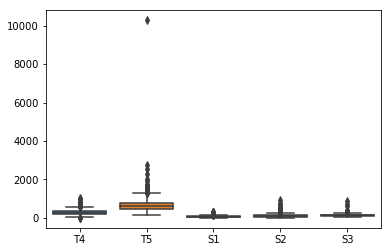

In [89]:
# Standardize the data before running the box plots
#print(sns.boxplot(data = p_df))
#print(sns.boxplot(data = c_df))
#print(sns.boxplot(data = t_df))
print(sns.boxplot(data = s_df))

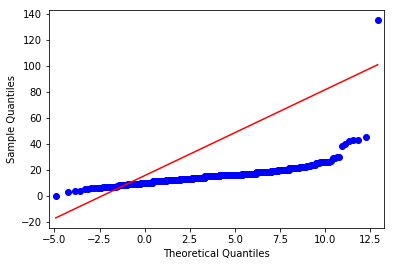

In [90]:

import pylab
sm.qqplot(p_df['P(H)'],loc = 4, scale = 3, line='s')
pylab.show()

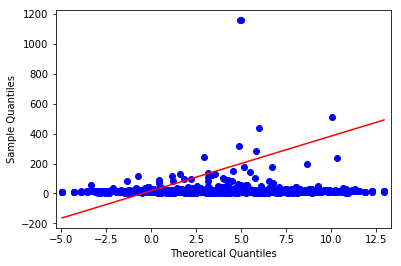

In [91]:
sm.qqplot(p_df,loc = 4, scale = 3, line='s')
pylab.show()

In [92]:
#ad_test = stats.anderson(p_df, dist='norm')
#print(ad_test)

# Normalization Code

In [93]:
# creating the titles for the log columns and normalizing those columns by taking the log of the original columns
log_col_list =[]
for col in col_list:
    col="log_"+col
    log_col_list.append(col)
log_col_list
df_impute_copy[log_col_list] = np.log(df_impute_copy[col_list])
df_impute_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 39 columns):
I1             682 non-null object
I2             682 non-null object
I3             682 non-null object
P(IPO)         682 non-null float64
P(H)           682 non-null float64
P(L)           682 non-null float64
P(1Day)        682 non-null float64
C1             682 non-null float64
C2             682 non-null category
C3             682 non-null float64
C4             682 non-null float64
C5             682 non-null float64
C6             682 non-null float64
C7             682 non-null float64
T1             682 non-null float64
T2             682 non-null float64
T3             682 non-null float64
T4             682 non-null float64
T5             682 non-null float64
S1             682 non-null float64
S2             682 non-null float64
S3             682 non-null float64
log_P(H)       682 non-null float64
log_P(L)       682 non-null float64
log_P(1Day)    682 non-null float

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in log
  import sys


In [94]:
# creating the titles for the log columns and normalizing those columns by taking the sqrt of the original columns
sqrt_col_list =[]
for col in col_list:
    col="sqrt_"+col
    sqrt_col_list.append(col)
log_col_list
df_impute_copy[sqrt_col_list] = np.sqrt(df_impute_copy[col_list])
df_impute_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 56 columns):
I1              682 non-null object
I2              682 non-null object
I3              682 non-null object
P(IPO)          682 non-null float64
P(H)            682 non-null float64
P(L)            682 non-null float64
P(1Day)         682 non-null float64
C1              682 non-null float64
C2              682 non-null category
C3              682 non-null float64
C4              682 non-null float64
C5              682 non-null float64
C6              682 non-null float64
C7              682 non-null float64
T1              682 non-null float64
T2              682 non-null float64
T3              682 non-null float64
T4              682 non-null float64
T5              682 non-null float64
S1              682 non-null float64
S2              682 non-null float64
S3              682 non-null float64
log_P(H)        682 non-null float64
log_P(L)        682 non-null float64
log_P(1Da

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in sqrt
  import sys


In [95]:
# creating the titles for the log columns and normalizing those columns by taking the inverse of the original columns
inverse_col_list =[]
for col in col_list:
    col="inverse_"+col
    inverse_col_list.append(col)
log_col_list
df_impute_copy[inverse_col_list] = 1/(df_impute_copy[col_list])
df_impute_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 73 columns):
I1                 682 non-null object
I2                 682 non-null object
I3                 682 non-null object
P(IPO)             682 non-null float64
P(H)               682 non-null float64
P(L)               682 non-null float64
P(1Day)            682 non-null float64
C1                 682 non-null float64
C2                 682 non-null category
C3                 682 non-null float64
C4                 682 non-null float64
C5                 682 non-null float64
C6                 682 non-null float64
C7                 682 non-null float64
T1                 682 non-null float64
T2                 682 non-null float64
T3                 682 non-null float64
T4                 682 non-null float64
T5                 682 non-null float64
S1                 682 non-null float64
S2                 682 non-null float64
S3                 682 non-null float64
log_P(H)         

In [100]:
#from openpyxl.workbook import Workbook
df_impute_copy.to_csv("output.csv")

In [ ]:
#col_list_inverse = df_impute_copy.iloc[:,[0,1,2,3,8,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72]].columns.tolist()
#col_list_sqrt
#col_list_log
#col_list_inverse

In [ ]:
df_impute_copy.describe()

In [ ]:
p_df = df_impute_copy.iloc[:,55:58]
sns.pairplot(p_df, dropna =False)
c_df = df_impute_copy.iloc[:,58:64]
sns.pairplot(c_df, dropna =False,hue="C2")
t_df = df_impute_copy.iloc[:,64:69]
sns.pairplot(t_df, dropna =False)
s_df = df_impute_copy.iloc[:,69:]
sns.pairplot(s_df, dropna =False)

# Calculated Fields (Where we stopped)

In [101]:
#Create variable true_value for C6P
# Add T1 T4/T1 S1 = S1/S2 Calcualte all the ratios for the Ts & S Colums
true_value = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100

#Create new columns
#Add them to df_alternate_copy
#Create P(mid) variable
df_alt_copy['P(mid)'] = (df_alt_copy['P(H)'] + df_alt_copy['P(L)']) / 2
df_alt_copy['C3P'] = np.where(df_alt_copy['C3'] > 0, '1', '0')
df_alt_copy['C5P'] = df_alt_copy['C5'] / df_alt_copy['C6']
df_alt_copy['C6P'] = np.where(df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)'], true_value, '0')
df_alt_copy['Y1'] = np.where(df_alt_copy['P(IPO)'] < df_alt_copy['P(mid)'], '1', '0')
df_alt_copy['Y2'] = np.where(df_alt_copy['P(IPO)'] < df_alt_copy['P(1Day)'], '1', '0')




#if df_alt_copy['P(IPO)'] > df_alt_copy['P(mid)']:
    #df_alt_copy['C6P'] = ((df_alt_copy['P(IPO)'] - df_alt_copy['P(mid)']) / df_alt_copy['P(mid)'])*100 
#else :
    #df_alt_copy['C6P'] = 0

df_alt_copy.head()

NameError: name 'df_alt_copy' is not defined

# Correlation Code

In [ ]:
# evaluates ranked variables or ordinal
# used if we have not normalized first
# Add Corr with functions
spearman =df_impute_copy[col_list_inverse].corr(method ='spearman')
sns.heatmap(spearman, annot=True)

In [ ]:
# evaluates ranked variables or ordinal
# used if we have not normalized first
# prefered in small samples or if there are outliers
# more accurate than spearman
kendall = df_impute_copy.corr(method ='kendall')
sns.heatmap(kendall, annot=True)

In [ ]:
# used to evaluate continuous variables
# is prefered for our dataset
# need to normalize before we calcualte
pearson = df_impute_copy.corr(method ='pearson')
sns.heatmap(pearson, annot=True)

# Feature Selection to reduce the columns
    * Split SIC Code to possibly use for feature engeneering near the end
  *  https://towardsdatascience.com/feature-selection-using-wrapper-methods-in-python-f0d352b346f

In [ ]:
#df_copy['I3'].str.split(n=4)
#You loaded the data in a DataFrame object called dataframe now.

#Let's convert the DataFrame object to a NumPy array to achieve faster computation. 
#Also, let's segregate the data into separate variables so that the features and the labels are separated.

#array = dataframe.values
#X = array[:,0:8] #features
#Y = array[:,8] #target

In [ ]:
# Import the necessary libraries first
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
# Feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, Y)

# Summarize scores
np.set_printoptions(precision=3)
print(fit.scores_)

features = fit.transform(X)
# Summarize selected features
print(features[0:5,:])

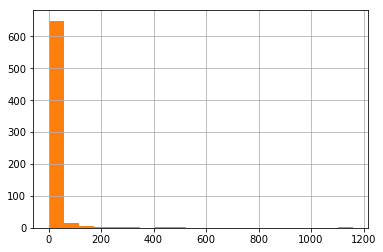

In [69]:
#use histogram to visualize the # of observations for IPO prices
df_impute_copy['P(IPO)'].hist (bins=20)
#use histogram to visualize the # of observations for IPO 1Day prices
df_impute_copy['P(1Day)'].hist (bins=20)

In [83]:
#for feature in col_list: 
 #   print(plt.pyplot.hist(df_copy[feature], bins=10,range=[0,40]))


In [84]:
#plt.pyplot.hist(df_copy[col_list], bins=10, range=None, density=None, weights=None, cumulative=False, bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, label=None, stacked=False, normed=None, data=None)

In [71]:
#To filter out only continuous columns
#float_cols = col_list
#replacement = df_copy.loc[:,float_cols]
#print(replacement)

In [70]:
#sm.qqplot(df_copy['C7'])

In [ ]:
#box_plot = plt.figure(figsize=(4,3))
#ax1 = box_plot.add_subplot(1,1,1)
#ax1.boxplot(
    # first argument is the data
    # since we are plotting over two pieces of data
    # we have to put each piece of data into a list
    #[tips[tips.sex == 'Female']['tip'],
     #tips[tips.sex == 'Male']['tip']],
    # we can pass in optional parameter to label the data
    #labels = ['Female', 'Male'])
#ax1.set_xlabel('Sex')
#ax1.set_ylabel('Tip')
#ax1.set_title('Tips by Sex in boxplot')
#box_plot.show()